<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:700">Credit Risk Detection</div>

# <b><span style='color:#4B4B4B'>1 |</span><span style='color:#016CC9'> Project Overview </span></b>
The **objective** of [this dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) is to **develop a machine learning model that can accurately detect fraudulent credit card transactions**. The dataset used for this project contains anonymized credit card transactions that occurred in September 2013, with 492 fraudulent transactions out of a total of 284,807 transactions. The dataset is highly unbalanced, with frauds accounting for only 0.172% of all transactions.

The dataset contains only numerical input variables, which have been transformed using PCA for confidentiality reasons. The features V1, V2, … V28 are the principal components obtained through PCA, while the features 'Time' and 'Amount' have not been transformed with PCA. The feature 'Time' contains the time elapsed between each transaction and the first transaction in the dataset, and the feature 'Amount' contains the transaction amount.

The response variable is the 'Class' feature, which takes a value of 1 in the case of fraud and 0 otherwise. Due to the class imbalance ratio, accuracy measurement using the Area Under the Precision-Recall Curve (AUPRC) is recommended, as confusion matrix accuracy is not meaningful for unbalanced classification.


The project involves the following steps:

* **Exploratory Data Analysis (EDA)** to understand the distribution of the features and their relationship with the target * variable.
* **Feature Engineering** to create new features that may improve the model's performance.
* **Data Preprocessing** to handle missing or outlier data, and scaling the features.
* **Model Selection** and Hyperparameter Tuning using various classification algorithms such as Logistic Regression, Decision Trees, Random Forest, and XGBoost.
* **Model Evaluation** using AUPRC, F1 Score, and other relevant metrics.
* **Deployment** of the best-performing model in a production environment.

# <b><span style='color:#4B4B4B'>2 |</span><span style='color:#016CC9'> Data Overview</span></b>
The dataset used for this project contains credit card transactions that occurred in September 2013, made by European cardholders. The dataset includes 31 features, of which 28 features have been transformed using PCA for confidentiality reasons, and the remaining features are 'Time', 'Amount', and 'Class.

The features considered in the dataset are as follow:

**`28 features`:** obtained by PCA transformation (denoted as V1, V2, ... V28) <br>
**`2 non-transformed features*`:** 'Time' and 'Amount'.<br>
**`Target variable*`:** Payment variables: 'Class' (1 for fraud, 0 for genuine). <br>  







In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head(3)

# <b><span style='color:#4B4B4B'>3 |</span><span style='color:#016CC9'> Limitations </span></b>

The dataset contains only transactions that occurred in two days and may not be representative of a broader time period. Additionally, the PCA transformation makes it difficult to interpret the original features, and the limited sample size may require additional exploration and preprocessing for optimal model performance. 

## Feature Technicalities: 
* **PCA Transformation**: The description indicates the data have been through PCA transformation (Dimensionality Reduction) except for "time" and "amount".
* **Scaling**: We have to be aware that PCA transformation requires **data to be previosly scaled** so we must start from this principle. 

# <b><span style='color:#4B4B4B'>4 |</span><span style='color:#016CC9'> Exploratoy Data Analysis (EDA) </span></b>

The dataset contains only transactions that occurred in two days and may not be representative of a broader time period. Additionally, the PCA transformation makes it difficult to interpret the original features, and the limited sample size may require additional exploration and preprocessing for optimal model performance.

In [ ]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold 
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import roc_auc_score, roc_curve, auc
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import warnings, gc
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import time
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))
        

In [ ]:
df.shape

The shape of the dataset is (284807, 31), which means that there are 284,807 rows and 31 columns in the dataset. Each row represents a credit card transaction, and the 31 columns include 28 transformed features, 2 non-transformed features ('Time' and 'Amount'), and the target variable 'Class'.

In [ ]:
df.info()

All columns have non-null values, indicating that there are no missing data in the dataset. The data type for all columns, except for the Class column, is float64 while the Class column has an integer data type. 

In [ ]:
df.describe()

### **Quick Insights**
* The count of all the columns is the same, indicating that there are **no missing values in the dataset**.

* The mean of the Class column is very small (0.001727), which suggests that the **dataset is highly imbalanced**, with very few fraud cases.

* The standard deviation (std) of the Amount column is much higher than the mean, which suggests that **there are some extreme values (outliers)** in the dataset. This is also visible from the minimum and maximum values of the Amount column.

* The mean of all the other columns (except for the Time column) is very close to zero, and their standard deviation is relatively small. This suggests that t**he data is centered around zero and is normalized.**

* The range of the values in each column is quite different, with some columns having values ranging from -72 to 256, while others range from -5 to 40. This suggests that **some columns may have more predictive power than others**, and **feature scaling may be necessary before fitting** a machine learning model.

Let's check if the data is skewed: 

In [ ]:
fig = px.histogram(df, x="Class", color="Class",
                   color_discrete_sequence=["#3366CC", "#DC3912"], 
                   title="Class Distribution")
fig.update_layout(xaxis_title="Class", yaxis_title="Count", 
                  font=dict(family="Arial", size=12))
fig.update_traces(marker_line_width=0)
fig.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

**Note:** It is important to highlight that our original **dataset is imbalanced**, where the *majority of transactions are non-fraudulent*. If we utilize this dataset as the foundation for our predictive models and analysis, it is likely that we will encounter a significant number of errors and our algorithms may overfit, assuming that most transactions are not fraudulent. However, our goal is not to make assumptions but to accurately detect patterns that indicate fraudulent activity. Therefore, we must **approach this task with a rigorous and unbiased methodology,** ensuring that our model can identify even the slightest signs of fraudulent behavior.

By seeing the following graphs we can have an idea how skewed these data is, we can also see further distributions of the other features. This technique help us to acknowledge we will need to work with the outliers of the data.

In [ ]:
fig = px.histogram(df, x="Time",
                   color_discrete_sequence=["#24788F"], 
                   title="Distribution of Transaction Time")
fig.update_layout(xaxis_title="Time", yaxis_title="Count", 
                  font=dict(family="Arial", size=12))
fig.update_traces(marker_line_width=0)
fig.show()

In [ ]:
fig = px.box(df, y="Amount", 
             title="Distribution of Transaction Amount", 
             color_discrete_sequence=["#472731"])
fig.update_layout(yaxis_title="Amount", font=dict(family="Arial", size=12))
fig.update_traces(marker_line_width=0)
fig.show()

The Amount of Transactions boxplot does not even show the characteristics of the graph, while the Distribution of Transaction Time does not follow a normal distribution. We can conclude that indeed, this dataset contains outliers and that **the dataset is highly "imbalanced"** so we have to address these issues. 

# <b><span style='color:#4B4B4B'>4 |</span><span style='color:#016CC9'> Data Preprocessing </span></b>

## <b><span style='color:slategray'>4.1 |</span><span style='color:slategray'> Scaling the Data</span></b>

**Time** and **Amount** column must be **scaled** as the other features. <br>
We also have to **create a sub sample** of the dataframe to have an equitative amount of Fraud and Non-Fraud cases, this way our algorithm will better detect any potential pattern to determine wheter a transaction is fraudulent or not.
> **Understanding sub-Sample:** <br> Subsample means to have a equitative ratio 50/50 of fraudulent and non-fraudulent transactions. <br> **Importance of sub-Sampling:** This is the **correct way to address imbalanced datasets**. Otherwise, we could face: <br> - **Overfitting**: Our model would concentrate only on our dataset which would not be able to detect fraudulent transactions in real applications. <br> - **Wrong Correlations**:Because we do not know the descriptions of each column, we would not be able to correctly identify the correlations that really matter to the model, which would make it inefficient.


In [ ]:
# Columns to scale: Amount and Time
from sklearn.preprocessing import StandardScaler, RobustScaler # RobustScaler less prone to outliers

std_scaler = StandardScaler()
robust_scaler = RobustScaler()

df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop unnecessary column
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
# Inseting the amount and time to the first two columns
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
          
# save the data
#df.to_csv('data_scaled.csv', index=False)
df.head()

## <b><span style='color:slategray'>4.2 |</span><span style='color:slategray'> Splitting the data </span></b>
After we have scaled the Time and Amount columns, it is important to split the data into training and testing sets before distributing it. This allows us to evaluate the performance of the machine learning model on new, unseen data that was not used for training. Without splitting the data, the model may simply memorize the training set and perform poorly on new data.

Similarly, in order to properly implement the Random UnderSampling technique, it is necessary to first separate the original dataframe. This is done to ensure that the model is tested on the original testing set, rather than the testing set created by the undersampling technique. 

> The **purpose of undersampling or oversampling** is to **adjust the class balance of the training set**, and **then fit the model with the modified dataset to better detect patterns**. However, we want to **ensure** that **the model is evaluated on the original testing set** to obtain accurate performance metrics. Therefore, it is crucial to separate the original dataframe before implementing any sampling techniques.






In [ ]:
# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Original characteristics of the dataset
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

A **StratifiedKFold** object is created **to split the data into 5 folds** while maintaining the distribution of the classes in each fold. Then, a loop is used to print out the indices of the training and testing sets for each fold, and the corresponding data is extracted from the original dataset.

Afterwards, the code checks the distribution of labels for the training and testing sets. 
* **Distribution of labels** refers to the **proportion of classes** between fraudulent (labeled as 1) or non-fraudulent (labeled as 0) transactions. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

The two numbers in each set represent the predicted probabilities for each class. In this case, it appears that the model is predicting a high probability for the first class (most likely non-fraudulent transactions) and a low probability for the second class (most likely fraudulent transactions).

## <b><span style='color:slategray'>4.3 |</span><span style='color:slategray'> Distributing the data</span></b>
Distributing the data is important **to ensure that the machine learning model is trained on a balanced dataset**. When a dataset is highly unbalanced, with one class having significantly fewer samples than the other(s), the model may be biased towards the majority class, resulting in poor performance on the minority class. *By distributing* the data to achieve a balanced ratio, *we can provide equal importance to all classes* and help the model learn to make **accurate predictions for both the majority and minority classes**. In this section, we will look at two particular techniques used to distribute the data: **Under-Sampling and Oversampling with SMOTE**. This can ultimately improve the overall performance and reliability of the model.

## <b><span style='color:#416F85'>4.3.1 |</span><span style='color:#416F85'> Random Under-Sampling </span></b>
**Random Under-Sampling** is a technique used to balance imbalanced datasets by r*andomly selecting a subset of instances from the majority class to match the number of instances in the minority class*.
* In this scenario, it means bringing in a random sample in such a way that a **50/50 ratio is reached**. That is, if we have **492 cases of both classes** (fraudulent transactions 1 and non-fraudulent transactions 0).
* A **disadvantage**: We could face **information loss**. We are bringing 492 cases out of a total of over 280k! 

Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes:

In [ ]:
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

In [ ]:
print('The new shape of our dataset is: ', new_df.shape) # 492*2 = 984 -> 50/50 ratio

## <b><span style='color:slategray'>4.3.1.1 |</span><span style='color:slategray'> Feature Engineering for Random Under-Sampling </span></b>
Now that we have a balanced dataset, we can proceed with further analysis and data preprocessing to select the final features for our model.






In [ ]:
# Visualization of the new data
colors = ['#24788F', '#f78a85']

fig = px.histogram(new_df, x='Class', color='Class', color_discrete_sequence=colors, barmode='group')
fig.update_layout(title='Equally Distributed Classes', font=dict(size=14), width=700, height=500)
fig.update_xaxes(ticktext=['non-fraudulent transaction', 'fraudulent transaction'], tickvals=[0, 1])
fig.show()

## <b><span style='color:slategray'>4.3.1.2 |</span><span style='color:slategray'> Correlation Matrixes</span></b>
A correlation matrix provides a quantitative measure of the relationship between different variables in a dataset. This information is important because it can help identify **which variables are strongly or weakly related**, and inform decisions about feature selection, model building, and data preprocessing.We are looking for those features that influence heavily in whether a specific transaction is a fraud.

In the following, we will present two correlation matrices, one with the original dataframe, and one with the subset. 

In [ ]:
# compute the correlation matrix
corr = df.corr()
plt.figure(figsize=(18, 12), dpi=400)
# plot the correlation as a heatmap
sns.heatmap(corr, annot=False, linewidths=.5, fmt='.1f', cmap='mako_r')
plt.title('Correlation Matrix among variables (Original Dataset)')

It is almost impossible to find features that show a slightly strong correlation between them; all values are around 0, so **we should not use the original unbalanced dataset**.

Let's see how the subset performs: 

In [ ]:
# compute the correlation matrix
corr = new_df.corr()
plt.figure(figsize=(18, 12), dpi=400)
# plot the correlation as a heatmap
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', cmap='BrBG')
plt.title('Correlation Matrix among variables (Subset Dataset)')

With the subset dataset (balanced) we can better appreciate the behaviour between variables, and **it is possible to distinguish which are more and which are less correlated**. Let's observe the 5 highest correlated variables:

In [ ]:
# Select the top 3 features with the highest correlation 
corr_class = corr['Class'].sort_values(ascending=False)
top_5_corr = corr_class[1:6] # exclude Class column itself
table = pd.DataFrame({'Variable': top_5_corr.index, 'Correlation': top_5_corr.values})
table

In [ ]:
sns.pairplot(new_df, hue='Class', vars=top_5_corr.index)

In [ ]:
# Select the top 5 features with the lowest correlation 
corr_class = corr['Class'].sort_values(ascending=True)
neg_5_corr = corr_class[1:6] # exclude Class column itself
table_1 = pd.DataFrame({'Variable': neg_5_corr.index, 'Correlation': neg_5_corr.values})
table_1

### **Insights:**
> **1.** **'V4', 'V11', 'V2', 'V19', 'V20':** Means that these variables are the most **strongly correlated** with the target variable, and they may be features with **high predictive power** in determining wheter a transaction is fraudulent or not. The higher the correlation the more likely the end result will be a fraud transaction.<br>
> **2.** **'V12', 'V10', 'V16', 'V3', 'V17'**: A higher negative correlation indicates that the predictor is more likely to be associated with a fraudulent transaction. The higher the correlation the more likely the end result will be a fraud transaction.

Let's use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.


In [ ]:
temp1 = new_df[['V4', 'V11', 'V2', 'V19', 'V20', 'Class']]
temp1_melted = pd.melt(temp1, id_vars='Class', var_name='Variable', value_name='Value')

colors = ['#24788F', '#F18A85']
fig = px.box(temp1_melted, x='Class', y='Value', title='Boxplots of selected variables (Positive Correlation)',
             color='Class',facet_col='Variable', facet_col_wrap=3, points='all',color_discrete_sequence=colors)
fig.update_layout(height=600, width=1000) # set the size of the figure

fig.show()

In [ ]:
temp2 = new_df[['V12', 'V10', 'V16', 'V3', 'V17','Class']]
temp2_melted = pd.melt(temp2, id_vars='Class', var_name='Variable', value_name='Value')

colors = ['#849DAB','#4ECDC4']
fig = px.box(temp2_melted, x='Class', y='Value', title='Boxplots of selected variables (Negative Correlation)',
             color='Class', facet_col='Variable', facet_col_wrap=3, points='all', color_discrete_sequence=colors)
fig.update_layout(height=600, width=1000) # set the size of the figure

fig.show()

## <b><span style='color:slategray'>4.3.1.3 |</span><span style='color:slategray'> Handling Outliers </span></b>
As can be seen in the graphs above, for both scenarios (positive and negative variables correlated with the target),present some anomalies that need to be addressed.

* **Objective: Remove "extreme outliers"** from features that migh impact the accuracy of our models.


#### **Methods**
>**Interquartile Range Method (IQR):** Create a threshold between the 75th percentile and 25th percentile. Points beyond these instances will be deleted.

>**Boxplots:** Show the 25th and 75th percentiles (ends of the boxes) and extreme outliers (points outside the whiskers).

> **The Outlier Removal Tradeoff:** The lower the threshold the more outliers it will remove. The higher we set, the more outliers that might affect the model.

> **Approach:** Focus just on **"extreme outliers"**, not just **outliers**. Otherwise, we might run the risk of information loss which will cause our models to have a lower accuracy.


To begin the approach to eliminating outliers, we must determine **which feature** (from among Highest Negative Correlated) most **closely resembles a Gaussian distribution**. According to the following graphs, **V16 is the feature** that comes closest to this description, so it is the one **we will use for outlier removal**.

In [ ]:
from scipy.stats import norm
colors = ['#C5B3F9', '#64B6A6','#F18A85', '#24788F', '#849DAB']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Fraud Transactions - Distribution of V12, V10, V16', fontsize=16)

v12_fraud_dist = temp2['V12'].loc[temp2['Class'] == 1].values
sns.distplot(v12_fraud_dist, fit=norm, color=colors[0], ax=ax1)
ax1.set_title('V12 Distribution', fontsize=14)

v10_fraud_dist = temp2['V10'].loc[temp2['Class'] == 1].values
sns.distplot(v10_fraud_dist, fit=norm, color=colors[1], ax=ax2)
ax2.set_title('V10 Distribution', fontsize=14)

v16_fraud_dist = temp2['V16'].loc[temp2['Class'] == 1].values
sns.distplot(v16_fraud_dist, fit=norm, color=colors[2], ax=ax3)
ax3.set_title('V16 Distribution', fontsize=14)

fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Fraud Transactions - Distribution of V3, V17', fontsize=16)

v3_fraud_dist = temp2['V3'].loc[temp2['Class'] == 1].values
sns.distplot(v3_fraud_dist, fit=norm, color=colors[3], ax=ax4)
ax4.set_title('V3 Distribution', fontsize=14)

v17_fraud_dist = temp2['V17'].loc[temp2['Class'] == 1].values
sns.distplot(v17_fraud_dist, fit=norm, color=colors[4], ax=ax5)
ax5.set_title('V17 Distribution', fontsize=14)

plt.show()


As we defined we will be using **V12, **, let's start the outliers removal:

## <b><span style='color:slategray'>4.3.1.4 |</span><span style='color:slategray'> Outlier Removal Process </span></b>

As can be seen in the graphs above, for both scenarios (positive and negative variables correlated with the target), present some anomalies that need to be addressed.

> 1st: Define the Quartile 25 and Quartile 75. <br> 2nd: Define the Interquartile Range. <br>3rd: Define and **upper and lower threshold**, then follow the following rule: $$LowerExtreme = Q25 - threshold$$ $$UpperExtreme = Q75 + threshold$$ <br> 4th: **Conditional dropping**, removing instances beyond the interval defined in step 3. <br> 5th: Check boxplot with outliers removed.

### <b><span style='color:slategray'>A) |</span><span style='color:slategray'> Removing Outliers in V12: </span></b>
Let's begin to eliminate outliers with the highest negative correlated feature **V12 (-0.68).**

Let's remember the **original 50/50 ratio dataset shape** included: **(984, 31)**, let's see what's the new shape after the outliers removal process.

In [ ]:
v12_fraud = temp2['V12'].loc[temp2['Class'] == 1].values # Highest negative correlated with the target that follows a Gausian distribution

# Defining the quartiles as parameters for the outlier removal
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('Interquartile Range: {}'.format(v12_iqr))

In [ ]:
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V16 Lower Threshold: {}'.format(v12_lower))
print('V16 Upper Threshold: {}'.format(v12_upper))

In [ ]:
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

In [ ]:
# Drop outliers
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
new_df.shape

### <b><span style='color:slategray'>B) |</span><span style='color:slategray'> Removing Outliers in V10 </span></b>

Now let's remove outliers in **V10 feature.**

In [ ]:
v10_fraud = temp2['V10'].loc[temp2['Class'] == 1].values # Second highest negative correlated
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('Interquartile Range: {}'.format(v10_iqr))

In [ ]:
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower Threshold: {}'.format(v10_lower))
print('V10 Upper Threshold: {}'.format(v10_upper))

In [ ]:
outliers_10 = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers_10))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers_10)))

In [ ]:
# Drop outliers
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
new_df.shape

### <b><span style='color:slategray'>C) |</span><span style='color:slategray'> Removing Outliers in V16: </span></b>

In [ ]:
v16_fraud = temp2['V16'].loc[temp2['Class'] == 1].values # Third negative correlated with the target

# Defining the quartiles as parameters for the outlier removal
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v16_iqr = q75 - q25
print('Interquartile Range: {}'.format(v16_iqr))

In [ ]:
v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('Cut Off: {}'.format(v16_cut_off))
print('V16 Lower Threshold: {}'.format(v16_lower))
print('V16 Upper Threshold: {}'.format(v16_upper))

In [ ]:
outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers))) # No outliers in V16 to eliminate

We went from having **(984, 15)** to **(959, 31)**, which means that **we eliminated** a total of **25 outliers** for fraudulent cases.

In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

colors = ['#24788F', '#849DAB']
# Boxplots with outliers removed
# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.90, -14), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
ax1.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
            
# Feature 16
sns.boxplot(x="Class", y="V16", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V16 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.90, -14), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
ax2.set_xticklabels(["Non-Fraudulent", "Fraudulent"])

plt.show()

## <b><span style='color:slategray'>4.3.1.5 |</span><span style='color:slategray'> Dimensionality Reduction in Under-Sampling </span></b>
Dimensionality Reduction is a technique used in ML to r**educe the number of input features** in a dataset **while preserving the important information** contained in the original dataset. The goal of Dimensionality Reduction is to simplify the dataset, make it more manageable, and easier to analyze without losing too much information.

With that said, one of the techniques used is for example the PCA (which was already used in the original dataset). Another technique used is the one shown below and is called t-SNE or **t-distributed Stochastic Neighbor Embedding**. 

## <b><span style='color:slategray'> A) |</span><span style='color:slategray'> t-SNE Reduction Technique </span></b>

<div style="text-align:center;">
  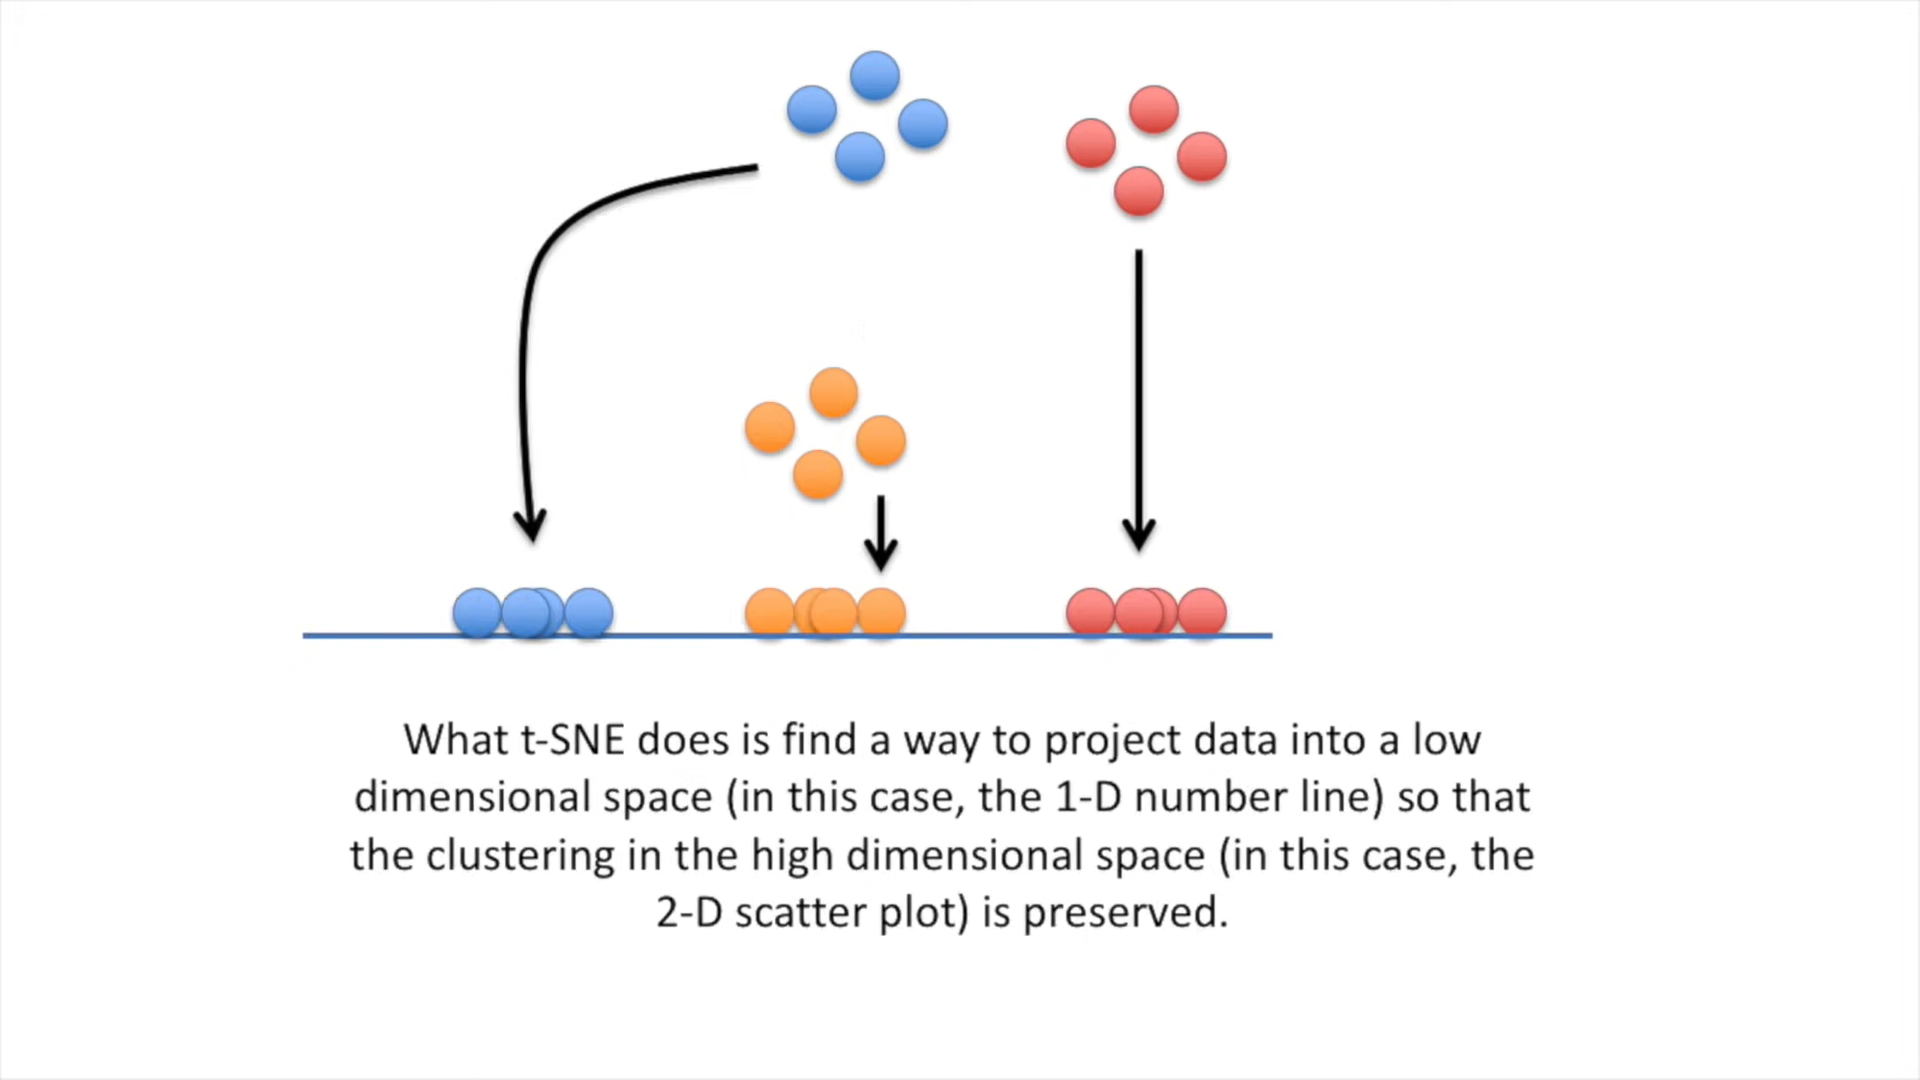
  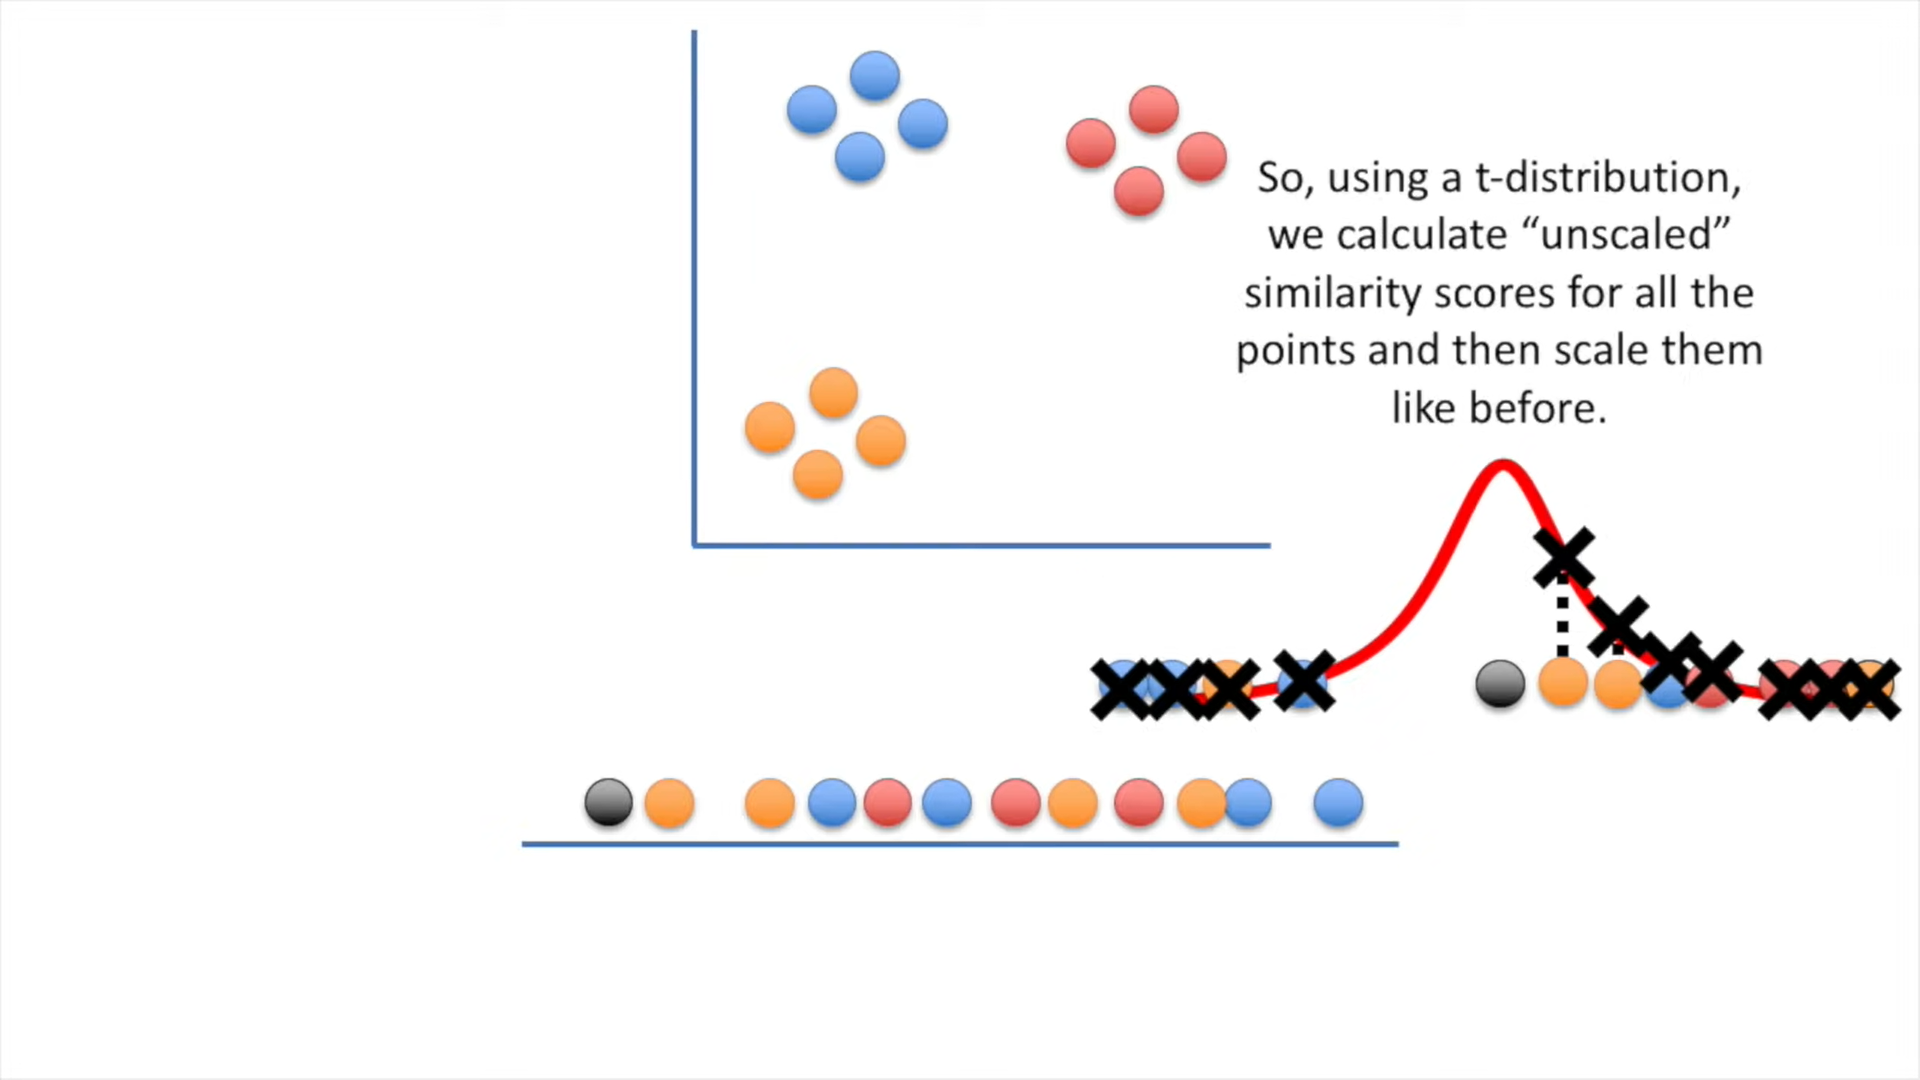
</div>
For more information, about t-SNE explanation, please do check this <a src="https://www.youtube.com/watch?v=NEaUSP4YerM&ab_channel=StatQuestwithJoshStarmer"> amazing video by StatQuest </a>

> **Considerations**: <br> 1. Subset need to be **shuffled** first. <br> 2. Although the subsample is pretty small, the t-SNE algorithm is able to **detect clusters pretty accurately** between cases that were fraud and non-fraud.

Let's compare how three different dimensionality reduction techniques perform on the target data: t-SNE, PCA and Truncated SVD.

In [ ]:
# Setting features and target
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# T-SNE Implementation
from sklearn.manifold import TSNE
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
res1 = t1 - t0

# PCA 
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t2 = time.time()
res2 = t2 - t0

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t3= time.time()
res3 = t3 - t0

table = pd.DataFrame({'Dimension Reduction Technique': ['t-SNE', 'PCA', 'Truncated SVD'], 'Time Taken': [res1,res2,res3]})
table

**t-SNE technique** is the one that took **the longest time** to complete the process with 4.60s of time. 

In [ ]:
new_df['Class'] = new_df['Class'].astype(str)
colors = ['#24788F','#F18A85']
fig = px.scatter(new_df, x=X_reduced_tsne[:,0], y=X_reduced_tsne[:,1], 
                  color_discrete_sequence=colors, title='t-SNE Reduced Dataset', 
                  color='Class', labels={"0": "Non-Fraudulent", "1": "Fraudulent"})
fig.show()

In [ ]:
fig = px.scatter(new_df, x=X_reduced_pca[:,0], y=X_reduced_pca[:,1], 
                  color_discrete_sequence=colors, title='PCA Reduction', 
                  color='Class', labels={"0": "Non-Fraudulent", "1": "Fraudulent"})
fig.show()

In [ ]:
fig = px.scatter(new_df, x=X_reduced_svd[:,0], y=X_reduced_svd[:,1], 
                  color_discrete_sequence=colors, title='Truncated SVD Reduction', 
                  color='Class', labels={"0": "Non-Fraudulent", "1": "Fraudulent"})
fig.show()

* t-SNE demonstrates better clustering behaviour between the two classes.
* t-SNE is useful for visualizing high-dimensional data in a lower-dimensional space. In this scenario, where we are dealing with a dataset of credit card transactions and trying to identify fraudulent transactions, t-SNE can be useful for visualizing the data in a way that may help us identify patterns or clusters that could be indicative of fraud.

# <b><span style='color:#4B4B4B'>6 |</span><span style='color:#016CC9'> Training Models </span></b>

In this stage of our analysis, our goal is to identify the most effective classifier for detecting fraudulent transactions. To achieve this, we will train four different types of classifiers and compare their performance using evaluation metrics.

However, before we can train our classifiers, we need to prepare our data by splitting it into training and testing sets. This is important to ensure that our classifiers are not simply memorizing the training data and are able to generalize to new, unseen data.

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# split data train 80 % and test 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Turn the values into arrays for the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Define classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes Classifier": GaussianNB()
}

Apply cross validation: 

In [ ]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

## <b><span style='color:slategray'>6.1 |</span><span style='color:slategray'> Hyperparameter Tuning using Cross Validation </span></b>

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_ # Logistic best estimator

# KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_ # KNears best estimator

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_ # Best estimator

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_ # tree best estimator

#GradientBoosting 
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train)
grad_boosting = grid_gb.best_estimator_ # Best Gradient Boosting Estimator

# Gaussian Naive Bayes
param_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
NB_search = GridSearchCV(GaussianNB(), param_grid=param_NB, cv=5)
NB_search.fit(X_train, y_train) 
NB_estimators = NB_search.best_estimator_ # Naive Bayes Best Estimator

Once each model have searched for its best features, we can see the new results for each algorithm 

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

gradient_score = cross_val_score(grad_boosting, X_train, y_train, cv =5)
print('Gradient Boosting Classifier Cross Validation Score', round(gradient_score.mean() * 100, 2).astype(str) + '%')

NB_score = cross_val_score(NB_estimators, X_train, y_train, cv =5)
print('Naive Bayes Classifier', round(NB_score.mean() * 100, 2).astype(str) + '%')

## <b><span style='color:slategray'>6.2 |</span><span style='color:slategray'> Undersampling during CV with NearMiss Technique </span></b>

**NearMiss** is a **type of undersampling technique** used in machine learning **to balance imbalanced datasets**. It works by **reducing the number of samples in the majority class** (i.e., the class with more samples) so that the dataset becomes more balanced.

The NearMiss technique selects the samples from the majority class that are closest to the samples in the minority class, and keeps only those samples. There are three variations of the NearMiss technique:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [ ]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

In [ ]:
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

In [ ]:
# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss(version=1).fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(26, 14), sharey=True)
    fig.suptitle('Learning Curves', fontsize=20, y=0.95)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    # Fifth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("Gradient Boosting \n Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")
    
    # Sixth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax6.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax6.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax6.set_title("Naive Bayes \n Learning Curve", fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc="best")
    
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, grad_boosting, NB_estimators, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

## <b><span style='color:slategray'>6.3 |</span><span style='color:slategray'> Evaluating Performance with ROC score </span></b>
ROC (Receiver Operating Characteristic) is a graph that shows how well a binary classifier system can distinguish between two classes by varying its discrimination threshold. The plot displays the true positive rate (TPR) against the false positive rate (FPR). A higher area under the ROC curve (AUC) indicates better classification performance, with 1 representing a perfect classifier and 0.5 representing a random classifier. ROC analysis is a widely used performance metric for binary classifiers in machine learning.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

GB_pred = cross_val_predict(grad_boosting, X_train, y_train, cv=5, method='decision_function')

NB_pred= cross_val_predict(NB_estimators, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Gradient Boosting Classifier: ', roc_auc_score(y_train, GB_pred))
print('Naive Bayes Classifier: ', roc_auc_score(y_train, NB_pred))

## <b><span style='color:slategray'>6.3.1 |</span><span style='color:slategray'> ROC Curve Results</span></b>
The **ROC curve** is a graphical representation of the **performance of a binary classifier system, indicating the tradeoff between the true positive rate and the false positive rate**.

Looking at the results, the **Logistic Regression have the higher score, with 97.9%, which indicates a better performance in classifying the positive and negative samples.**. SVM and Gradient Boosting models have the higher AUC score, as well, but not as good as Logistic Regression. On the other hand, Naive Bayes and Decision Tree classifiers have lower AUC scores, which indicates a lower performance in classifying the samples. 

In [ ]:
knears_pred = pd.to_numeric(knears_pred, errors='coerce')
tree_pred = pd.to_numeric(tree_pred, errors='coerce')
NB_pred = pd.to_numeric(NB_pred, errors='coerce')
y_train = y_train.astype(int)

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
gradient_fpr, gradient_tpr, gradient_threshold = roc_curve(y_train, GB_pred)
naive_fpr, naive_tpr, naive_threshold = roc_curve(y_train, NB_pred)



def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, gradient_fpr, gradient_tpr, naive_fpr, naive_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 6 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(gradient_fpr, gradient_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, GB_pred)))
    plt.plot(naive_fpr, naive_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_train, NB_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, gradient_fpr, gradient_tpr, naive_fpr, naive_tpr)
plt.show()

# <b><span style='color:#4B4B4B'>7 |</span><span style='color:#016CC9'> Exploring Logistic Regression Classifier </span></b>
As Logistic Regression is the classifier with the highest score in the previous analysis, in this chapter we will further evaluate its performance.

In [ ]:
import plotly.graph_objs as go

log_auc = roc_auc_score(y_train, log_reg_pred)

def plot_roc_curve(fpr, tpr, auc):
    trace = go.Scatter(x=fpr, y=tpr,
                       mode='lines',
                       line=dict(width=2, color='blue'),
                       name=f'ROC curve (AUC = {auc:.3f})')
    layout = go.Layout(title='Logistic Regression ROC Curve',
                       xaxis=dict(title='False Positive Rate'),
                       yaxis=dict(title='True Positive Rate'))
    fig = go.Figure(data=[trace], layout=layout)
    fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=1, line=dict(color='red', dash='dash'))
    fig.update_layout(width=700, height=500)
    fig.show()
    
plot_roc_curve(log_fpr, log_tpr, log_auc)


## <b><span style='color:slategray'>7.1 |</span><span style='color:slategray'> Performance of the model </span></b>

The first code block is evaluating the performance of the logistic regression model on the training set. The model is predicting the target variable y for the input features X_train, and then the recall, precision, F1 score, and accuracy are computed using the predicted and actual target values.

The second code block is showing how the performance evaluation should look like after undersampling the majority class in the dataset. The metrics are computed using the same method, but this time the model is trained on the undersampled dataset, and then evaluated on a separate validation set. The accuracy is much higher, but the precision and recall are low due to the class imbalance, indicating that the model is not able to correctly identify all the positive cases.

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

In [ ]:
# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

undersample_y_score = log_reg.decision_function(original_Xtest)

from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

#print('Average precision-recall score: {0:0.2f}'.format(
 #     undersample_average_precision))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=recall, y=precision, color='#9fafca', alpha=0.2, ax=ax)
ax.fill_between(recall, precision, alpha=0.2,
                 color='#0e387a')
ax.set(xlabel='Recall', ylabel='Precision', ylim=[0.0, 1.05], xlim=[0.0, 1.0],
       title='UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision))

An average **precision-recall score of 0.09 is quite low**, indicating poor model performance. A high precision-recall score is desired, as it indicates that the model has a high precision (low false positive rate) and a high recall (low false negative rate).

**A score of 0.09 suggests that the model is not able to distinguish between positive and negative classes very well,** or that the dataset is imbalanced with a large number of negative samples. In either case, it would be necessary to evaluate the model's performance and possibly explore different models or data preprocessing techniques to improve its accuracy.

# <b><span style='color:#4B4B4B'>8 |</span><span style='color:#016CC9'> Over-Sampling: SMOTE Technique </span></b>
Because the under-sampling technique proved not to be as efficient with the Logistic Regression model, it is necessary to explore new ways to deal with the imbalance in the data. We will now try **SMOTE (Synthetic Minority Over-sampling Technique).** This a method that g**enerates synthetic samples for the minority class by creating new samples that interpolate between existing minority class samples.** This technique can help to balance the dataset without discarding any information, and can potentially improve the generalization performance of the model. 

> **Important features of SMOTE**: <br> **1. Solving the Class Imbalance:** SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. <br> **2. Location of the synthetic points:** SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.<br> **3. Final Effect:** More information is retained (we don´t delete any rows unlike in random undersampling).<br> **4. Accuracy || Time Tradeoff:** SMOTE will be more accurate than random under-sampling, though it may take more time to train (no rows are eliminated). 

## <b><span style='color:slategray'>A) |</span><span style='color:slategray'> Cross Validation during SMOTE </span></b>
Briefly, **cross validation must be done before Under-Sampling or Over-Sampling**, otherwise we might face data leakage -and overfitting-
This is the correct way: SMOTE occurs during CV, not prior to the CV process. Synthetic data are create only for the training set without affecting the validation set.

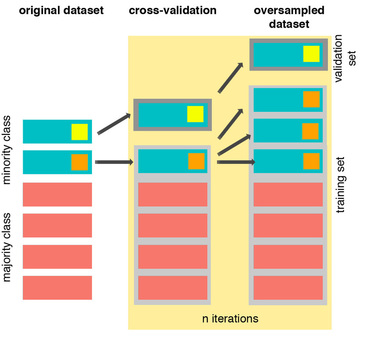


## <b><span style='color:slategray'>8.1 |</span><span style='color:slategray'> Implementing SMOTE </span></b>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

## <b><span style='color:slategray'>8.1 |</span><span style='color:slategray'> SMOTE Metrics Results </span></b>
The precision score of 0.10 for fraud indicates that out of all the fraud predictions made by the model, only 10% were actually fraud cases. The recall score of 0.86 for fraud suggests that the model correctly identified 86% of all actual fraud cases. It's also worth noting that the macro-average F1-score is relatively low at 0.58, which indicates that the model's performance is somewhat imbalanced between the two classes.



In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

An average precision-recall score of 0.70 suggests that the model has good precision and recall for the task it was trained to do. The precision-recall curve plots the precision against the recall for different threshold values, and the area under the curve (AUC) provides a summary of the overall performance of the model.



In [ ]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
# Count the number of observations for each target class
original_counts = pd.Series(original_ytrain).value_counts()
resampled_counts = pd.Series(ysm_train).value_counts()

# Create a bar plot to show the distribution of target variable before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(x=original_counts.index, y=original_counts.values, ax=ax[0])
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, ax=ax[1])
ax[0].set_title('Before SMOTE')
ax[1].set_title('After SMOTE')
fig.suptitle('Target variable distribution')
plt.show()

In [ ]:
# We Improve theargsort score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

# <b><span style='color:#4B4B4B'>9 |</span><span style='color:#016CC9'> Overall Performance: Confussion Matrix </span></b>
In this sections we'll compare the performance of oversampling vs undersampling in relation with their Confussion Matrices. 

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test).astype(str)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test).astype(str)
y_pred_svc = svc.predict(X_test).astype(str)
y_pred_tree = tree_clf.predict(X_test).astype(str)
y_pred_grad_boosting = grad_boosting.predict(X_test).astype(str)
y_pred_NB_estimators = NB_estimators.predict(X_test).astype(str)

# convert y_test to string
y_test = y_test.astype(str)

# Creating the CFs
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
GB_cf = confusion_matrix(y_test, y_pred_grad_boosting)
NB_cf = confusion_matrix(y_test, y_pred_NB_estimators)

fig, ax = plt.subplots(3, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2][0].set_title("Gradient Boosting Classifier \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[2][1], annot=True, cmap=plt.cm.copper)
ax[2][1].set_title("Naive Bayes Classifier \n Confusion Matrix", fontsize=14)
ax[2][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Gradient Boosting Classifier:')
print(classification_report(y_test, y_pred_grad_boosting))

print('Naive Bayes Classifier:')
print(classification_report(y_test, y_pred_NB_estimators))

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
y_test = y_test.astype(int)
undersample_score = accuracy_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

The results show that both random undersampling and oversampling using SMOTE improved the performance of the model compared to the previous results. The oversampling technique using **SMOTE achieved a higher score of 0.98822 compared to random undersampling, which achieved a score of 0.95288**. This indicates that oversampling using **SMOTE was more effective in improving the performance of the model.** 

# <b><span style='color:#4B4B4B'> 10 |</span><span style='color:#016CC9'> Neural Networks: Under-Sampling vs Over-Sampling </span></b>

In this section, we aim to compare the accuracy of detecting fraudulent and non-fraudulent transactions between the two logistic regression models we implemented earlier - one with undersampling and the other with oversampling using SMOTE. To achieve this, we will be implementing a simple neural network with a single hidden layer.

> **GOAL** <br> We aim to evaluate the performance of our **neural network** in detecting fraud and non-fraud transactions **using both random undersample and oversample (SMOTE) dataframes**. It's crucial to correctly categorize non-fraud transactions to avoid false blocking of legitimate cardholder purchases. <br><br> **Neural Network Structure:** <br> **Dataset:** We will fit this model in both the random undersampled subset and oversampled dataset (SMOTE) in order to predict the final result using the original dataframe testing data.


| Layer          | Number of Nodes | Other Characteristics         |
| --------------|----------------| ------------------------------|
| Input          | Number of features + 1 (bias node) | - |
| Hidden         | 32             | Activation function: Relu     |
| Output         | 1              | Activation function: Sigmoid  |
| Learning Rate  | 0.001          | Optimizer: AdamOptimizer       |
| Loss Function  | Sparse Categorical Cross Entropy   | Prediction: highest probability

## <b><span style='color:slategray'>10.1 |</span><span style='color:slategray'> Neural Network + Undersampling </span></b>

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
undersample_model.summary()

In [ ]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The accuracy scores for the training set range from 0.9803 to 0.9967, which suggests that the model is learning the patterns in the data very well. The validation accuracy scores are also high, ranging from 0.9346 to 0.9346, which suggests that the model is generalizing well to new data. However, it is worth noting that the validation accuracy scores are not improving as the number of epochs increases, which could indicate that the model is overfitting.

The loss scores for both the training and validation sets decrease as the number of epochs increases, which indicates that the model is learning to make more accurate predictions. However, the validation loss scores are consistently higher than the training loss scores, which suggests that the model is not generalizing perfectly to new data.

Overall, this result indicates that the model is performing well on the given data but may benefit from further tuning or regularization to prevent overfitting.

## <b><span style='color:slategray'>A) |</span><span style='color:slategray'> Performance of the model: Under Sampling</span></b>

In [ ]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)


In [ ]:
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
undersample_fraud_predictions = np.argmax(undersample_fraud_predictions, axis=1)


In [ ]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Blues)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Oranges)

## <b><span style='color:slategray'>10.2 |</span><span style='color:slategray'> Neural Network + Oversampling SMOTE </span></b>

**Structure of the Neural Network:** 


| Layer          | Number of Nodes | Other Characteristics         |
| --------------|----------------| ------------------------------|
| Input          | Number of features + 1 (bias node) | - |
| Hidden         | 32             | Activation function: Relu     |
| Output         | 1              | Activation function: Softmax  |
| Learning Rate  | 0.001          | Optimizer: AdamOptimizer       |
| Loss Function  | Sparse Categorical Cross Entropy   | Prediction: highest probability

In [ ]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

# Create a line plot for loss
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Training Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Create a line plot for accuracy
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## <b><span style='color:slategray'>B) |</span><span style='color:slategray'> Performance of the model: SMOTE</span></b>

In [ ]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = np.argmax(oversample_model.predict(original_Xtest), axis=-1)
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Blues)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Oranges)

# <b><span style='color:#4B4B4B'> 11 |</span><span style='color:#016CC9'> Summary and Next Steps </span></b>

In summary, implementing **SMOTE on our imbalanced dataset helped us balance the labels of our data**. However, our **oversampled model sometimes predicts less correct fraud transactions than our undersampled model**. We should keep in mind that our undersampled model is unable to detect non-fraud transactions correctly, leading to misclassification of non-fraud transactions as fraud transactions. This can cause a lot of customer complaints and dissatisfaction, which is a disadvantage for the financial institution. Our next step will be to perform outlier removal on our oversampled dataset and check if it improves the accuracy of our model on the test set.

> **Next Steps:** <br> **1. Perform outlier removal on our oversampled dataset**. We should remove the outliers using the Interquartile Range (IQR) method, which we previously used on the random undersample dataset. <br> **2.** After removing the outliers, we should retrain and evaluate our oversampled model on the cleaned dataset. <br> **3. Compare the performance of our new model with the previous models** to see if outlier removal improves the accuracy of our model. <br> **4.** Finally, we will **explore other techniques such as feature engineering, hyperparameter tuning, and model ensemble** to further improve the performance of our model.


# <b><span style='color:#4B4B4B'> 12 |</span><span style='color:#016CC9'> References </span></b>
1. [Janio Martinez Bachmann Dealing with Imbalanced Datasest](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook)
2. [Pavan Saganati Automated Hyperparameter Tuning](https://www.kaggle.com/code/pavansanagapati/automated-hyperparameter-tuning)
3. [Tara Boyle Methods to deal with Imbalanced Data](https://www.kaggle.com/code/tboyle10/methods-for-dealing-with-imbalanced-data)
4. [Hridesh Kohli Advanced Feature Selection Analysis-Classification](https://www.kaggle.com/code/hrideshkohli/advanced-feature-selection-analysis-classification)